# Summarize the subject metadata available for bam files


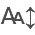

In [ ]:
try:
  from itables import(
     init_notebook_mode, show 
    ) 
except:
  !pip install -r https://raw.githubusercontent.com/CancerDataAggregator/Community-Notebooks/main/requirements.txt


import numpy as np
import pandas as pd
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)
import itables.options as opt

opt.classes="display nowrap compact"
opt.buttons=["copyHtml5", "csvHtml5", "excelHtml5"]
opt.maxBytes=0

from cdapython import *

I'm a developer, and I have written a new mutation calling pipeline. I've tested it on my own small dataset, but now I'm looking for a larger set of bam files that I can run through it.

First, decide what column to search. I'm looking for columns that are part of the file table:

In [2]:
columns(table="file")

table            column data_type  nullable  \
0   file           file_id      text     False   
1   file            access      text      True   
2   file     anatomic_site      text      True   
3   file          category      text      True   
4   file           drs_uri      text      True   
5   file  file_description      text      True   
6   file         file_name      text      True   
7   file         file_type      text      True   
8   file            format      text      True   
9   file              size    bigint      True   
10  file   tumor_vs_normal      text      True   

                                          description  
0   A unique identifier for this file minted by CD...  
1                  Denotes controlled vs open access.  
2   One or more anatomic sites described by this f...  
3   General category of file data. In the case of ...  
4   A resolvable DRS URI minted for this file and ...  
5                 Optional text describing this file.  
6   File name or label (may optionally include loc...  
7   File data type (like "CT image" or "miRNA expr...  
8                File format (like JPEG, PDF or CSV).  
9   File size in bytes. In the case of a DICOM ser...  
10  One or more tumor/normal characterizations of ...

`file_format` is what I'm looking for. Now I want to see whether `bam` is a valid value in it:

In [3]:
column_values("format")

format  value_count
0               DICOM       953690
1                 VCF       342606
2                 TBI       303604
3                 TSV       232860
4                 BAM       207362
5                 BAI       159157
6                 MAF       156598
7                 TXT       146803
8               FASTQ       100284
9               BEDPE        80771
10               CRAM        57219
11               CRAI        57218
12               <NA>        48467
13               mzML        43473
14          mzIdentML        39770
15               IDAT        38346
16                SVS        34337
17                CEL        25779
18            BCR XML        24101
19               TIFF        23709
20                PDF        20519
21               JSON        19342
22                TAR        16713
23        BCR SSF XML        10755
24               HTML         5315
25  BCR Auxiliary XML         2884
26           CDC JSON         2045
27              NIFTI         1835
28                PNG         1223
29        BCR OMF XML         1051
30               GVCF          899
31         BCR Biotab          602
32        BCR PPS XML          568
33                CSV          561
34                 GZ          447
35                SEG          377
36               XLSX          252
37               JPEG          215
38                CNS          207
39               HDF5          201
40                CDF          171
41                ZIP          120
42                MEX           90
43                 BW           83
44               DOCX           70
45                GCT           69
46           BEDGRAPH           51
47             TAR.GZ           49
48                HIC           34
49              FASTA           29
50                SVG           20
51                PED           14
52                RTF           14
53                DOC            8
54              idpDB            6
55                BED            5
56                RDS            5
57                XLS            3
58               DICT            2

The value in the database is `BAM`, so I'm going to use that. According to the column values, there's around 200 thousand files, but I'm interested in comparing variants for individuals, so I want a count of how many subjects have bam files:

In [ ]:
get_subject_data( match_all=["format = bam"])

subject_id cause_of_death     ethnicity   race species  \
0             FM.AD16707           <NA>          <NA>   <NA>   human   
1      TCGA.TCGA-X6-A8C4           <NA>  Non-Hispanic  White   human   
2      TCGA.TCGA-D6-A4Z9           <NA>  Non-Hispanic  White   human   
3         REBC.REBC-AC9Z           <NA>          <NA>   <NA>   human   
4      TCGA.TCGA-BP-4344           <NA>          <NA>  White   human   
...                  ...            ...           ...    ...     ...   
43978  TCGA.TCGA-Y8-A8RZ           <NA>  Non-Hispanic  White   human   
43979         FM.AD10941           <NA>          <NA>   <NA>   human   
43980  TCGA.TCGA-78-7535           <NA>          <NA>  White   human   
43981    BEATAML1.0.2657           <NA>  Non-Hispanic  Asian   human   
43982         FM.AD16403           <NA>          <NA>   <NA>   human   

      year_of_birth year_of_death data_source format  
0              <NA>          <NA>       [GDC]  [VCF]  
1              <NA>          <NA>  [GDC, IDC]  [VCF]  
2              <NA>          <NA>  [GDC, IDC]  [VCF]  
3              <NA>          <NA>       [GDC]  [VCF]  
4              <NA>          <NA>  [GDC, IDC]  [VCF]  
...             ...           ...         ...    ...  
43978          <NA>          <NA>  [GDC, IDC]  [VCF]  
43979          <NA>          <NA>       [GDC]  [VCF]  
43980          <NA>          <NA>  [GDC, IDC]  [VCF]  
43981          <NA>          <NA>       [GDC]  [VCF]  
43982          <NA>          <NA>       [GDC]  [VCF]  

[43983 rows x 9 columns]

I can also get a summary of the subject (or any other table) information for these files so I can decide what to filter next:

In [5]:
summarize_subjects( match_all=["format = bam"])

╔═══════════════════════════════╗
║ number_of_matching_subjects   ║
╠═══════════════════════════════╣
║ 43983                         ║
╚═══════════════════════════════╝
╔════════════════════════════════════════════════╗
║ number_of_files_related_to_matching_subjects   ║
╠════════════════════════════════════════════════╣
║ 342606                                         ║
╚════════════════════════════════════════════════╝
╔════════════╦═══════════════════════╗
║   subjects ║           data_source ║
╠════════════╬═══════════════════════╣
║      27621 ║              GDC only ║
║       9087 ║             GDC + IDC ║
║       2265 ║             CDS + IDC ║
║       1663 ║              CDS only ║
║       1278 ║       GDC + CDS + IDC ║
║       1093 ║ PDC + GDC + CDS + IDC ║
║        744 ║       PDC + GDC + IDC ║
║        176 ║             PDC + GDC ║
║         44 ║       PDC + GDC + CDS ║
║         12 ║             GDC + CDS ║
╚════════════╩═══════════════════════╝
╔════════════════╦═══════════

For instance, I might look for all of the subjects who have both a tumor sample and a normal control associated with them, because I'm interested in de novo cancer mutations. This means that I want to search the same column twice, once for subjects who have normal tissue and once for subjects that have tumor tissue, and only keep the intersection of those results:

In [11]:
normal = get_subject_data( match_all=["tumor_vs_normal = normal", "format = bam"])
tumor = get_subject_data( match_all=["tumor_vs_normal = tumor", "format = bam"])

both = intersect_subject_results(normal, tumor)
both

subject_id cause_of_death     ethnicity   race species  \
0      APOLLO.AP-27JZ           <NA>          <NA>  White   human   
1      APOLLO.AP-2E8Q           <NA>          <NA>  White   human   
2      APOLLO.AP-2XNK           <NA>          <NA>  White   human   
3      APOLLO.AP-3336           <NA>          <NA>  White   human   
4      APOLLO.AP-352Q           <NA>          <NA>  White   human   
...               ...            ...           ...    ...     ...   
22380    WCDT.DTB-258           <NA>  Non-Hispanic  White   human   
22381    WCDT.DTB-260           <NA>  Non-Hispanic  White   human   
22382    WCDT.DTB-261           <NA>  Non-Hispanic  White   human   
22383    WCDT.DTB-265           <NA>  Non-Hispanic  Asian   human   
22384    WCDT.DTB-266           <NA>  Non-Hispanic  White   human   

      year_of_birth year_of_death data_source format  tumor_vs_normal  
0              <NA>          <NA>  [GDC, PDC]  [BAM]  [normal, tumor]  
1              <NA>          <NA>  [GDC, PDC]  [BAM]  [normal, tumor]  
2              <NA>          <NA>  [GDC, PDC]  [BAM]  [normal, tumor]  
3              <NA>          <NA>  [GDC, PDC]  [BAM]  [normal, tumor]  
4              <NA>          <NA>  [GDC, PDC]  [BAM]  [normal, tumor]  
...             ...           ...         ...    ...              ...  
22380          <NA>          <NA>       [GDC]  [BAM]  [normal, tumor]  
22381          <NA>          <NA>       [GDC]  [BAM]  [normal, tumor]  
22382          <NA>          <NA>       [GDC]  [BAM]  [normal, tumor]  
22383          <NA>          <NA>       [GDC]  [BAM]  [normal, tumor]  
22384          <NA>          <NA>       [GDC]  [BAM]  [normal, tumor]  

[22385 rows x 10 columns]

It looks like there are about 22 thousand bams that contain comparisons between normal and tumor tissue. Now I could save that output to a file to browse through

In [12]:
both.to_csv('bams_tumor_normal.csv')

Or I could keep filtering by other fields. For instance, I might want just one anatomicial location:

In [ ]:
normal_lung = get_subject_data( match_all=["tumor_vs_normal = normal", "format = bam", "anatomic_site = lung"])
tumor_lung = get_subject_data( match_all=["tumor_vs_normal = tumor", "format = bam", "anatomic_site = lung"])
both_lung = intersect_subject_results(normal_lung, tumor_lung)
both_lung

subject_id        cause_of_death     ethnicity   race species  \
0      CMCP.OSA01-E8                  <NA>          <NA>   <NA>     dog   
1    CPTAC.C3L-00001                  <NA>  Non-Hispanic  White   human   
2    CPTAC.C3L-00009                  <NA>  Non-Hispanic  White   human   
3    CPTAC.C3L-00080                  <NA>  Non-Hispanic  White   human   
4    CPTAC.C3L-00081  Cancer-Related Death  Non-Hispanic  White   human   
..               ...                   ...           ...    ...     ...   
310  CPTAC.C3N-04168                  <NA>          <NA>   <NA>   human   
311  CPTAC.C3N-04173                  <NA>          <NA>  White   human   
312  CPTAC.C3N-04176                  <NA>          <NA>  White   human   
313  CPTAC.C3N-04180                  <NA>          <NA>  White   human   
314  CPTAC.C3N-04382                  <NA>  Non-Hispanic  White   human   

    year_of_birth year_of_death           data_source format  tumor_vs_normal  \
0            <NA>          <NA>                [ICDC]  [BAM]  [normal, tumor]   
1            1954          <NA>  [CDS, GDC, IDC, PDC]  [BAM]  [normal, tumor]   
2            1939          2017  [CDS, GDC, IDC, PDC]  [BAM]  [normal, tumor]   
3            1958          <NA>  [CDS, GDC, IDC, PDC]  [BAM]  [normal, tumor]   
4            1954          2017  [CDS, GDC, IDC, PDC]  [BAM]  [normal, tumor]   
..            ...           ...                   ...    ...              ...   
310          1967          <NA>       [GDC, IDC, PDC]  [BAM]  [normal, tumor]   
311          1948          <NA>       [GDC, IDC, PDC]  [BAM]  [normal, tumor]   
312          1955          2019       [GDC, IDC, PDC]  [BAM]  [normal, tumor]   
313          1947          2020       [GDC, IDC, PDC]  [BAM]  [normal, tumor]   
314          1970          <NA>       [GDC, IDC, PDC]  [BAM]  [normal, tumor]   

    anatomic_site  
0          [lung]  
1          [lung]  
2          [lung]  
3          [lung]  
4          [lung]  
..            ...  
310        [lung]  
311        [lung]  
312        [lung]  
313        [lung]  
314        [lung]  

[315 rows x 11 columns]